In [43]:
%load_ext autoreload
%autoreload 2

import sys
import os
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import interact, interactive, fixed
import ipywidgets as widgets

import plotly.graph_objects as go
from plotly.subplots import make_subplots

project_root = os.path.abspath(os.path.join(os.getcwd(), '..'))
sys.path.append(project_root)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [122]:
# import pybamm

# model = pybamm.lithium_ion.SPMe()
# help(model)

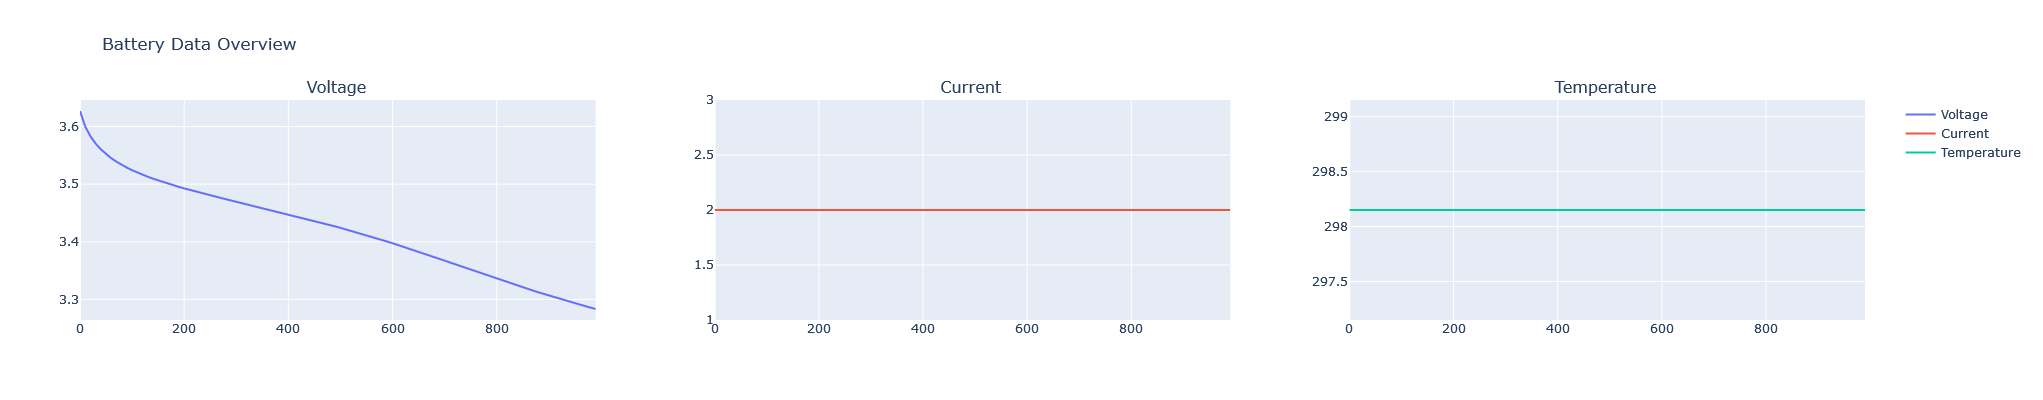

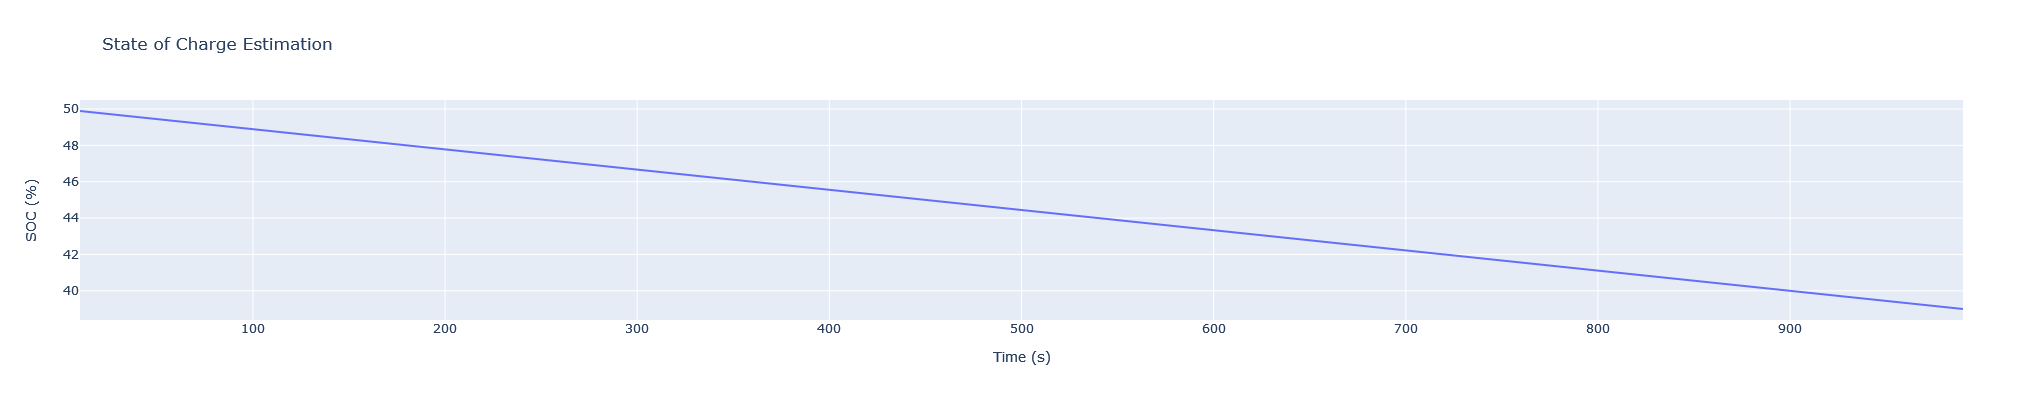

In [136]:
from utils.pybamm_data_generator import simply_generate_battery_data
from models.soc_estimation import coulomb_counting
from models.soh_estimation import capacity_fade

#====================================
capacity_Ah = 5 # Ah

initial_soc_percent = 50
cc_demand_A = 2

evaluation_time_step = 10 # s
num_points = 100 # datapoints
#====================================

time, voltage, current, temperature = simply_generate_battery_data(
    current=cc_demand_A, 
    num_points=num_points, 
    dt=evaluation_time_step, 
    capacity_Ah=capacity_Ah,
    initial_soc_percent=initial_soc_percent
)

fig = make_subplots(rows=1, cols=3, subplot_titles=("Voltage", "Current", "Temperature"), vertical_spacing=0.1)

fig.add_trace(go.Scatter(x=time, y=voltage, mode='lines', name='Voltage'), row=1, col=1)
fig.add_trace(go.Scatter(x=time, y=current, mode='lines', name='Current'), row=1, col=2)
fig.add_trace(go.Scatter(x=time, y=temperature, mode='lines', name='Temperature'), row=1, col=3)

fig.update_layout(height=400, width=1200, title_text="Battery Data Overview")
fig.show()

soc = coulomb_counting(current, time, initial_soc_percent, capacity_Ah)

fig_soc = go.Figure()
fig_soc.add_trace(go.Scatter(x=time[1:], y=soc, mode='lines', name='SOC (%)'))
fig_soc.update_layout(title='State of Charge Estimation',
                      xaxis_title='Time (s)',
                      yaxis_title='SOC (%)',
                      height=400,
                      width=800)
fig_soc.show()

SOH: 0.99


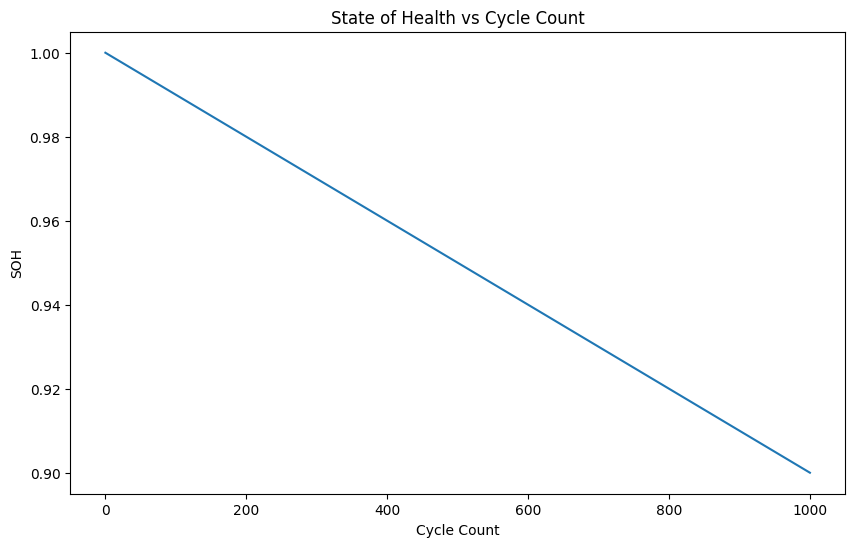

In [137]:
# Estimate SOH
cycle_count = 100
initial_capacity = 3000  # mAh
soh = capacity_fade(cycle_count, initial_capacity)

print(f"SOH: {soh:.2f}")

# Paramter Exploration
cycle_counts = range(0, 1001, 100)
soh_values = [capacity_fade(c, initial_capacity) for c in cycle_counts]

plt.figure(figsize=(10, 6))
plt.plot(cycle_counts, soh_values)
plt.title('State of Health vs Cycle Count')
plt.xlabel('Cycle Count')
plt.ylabel('SOH')
plt.show()